In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('austin_weather.csv')


In [18]:
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [20]:
import plotly.express as px 
fig = px.line(df, x="Date", y= "TempAvgF", title="Austin's average temp")
fig.show()

In [21]:
df.Date.nunique()

1319

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [24]:
df_temp = df[['Date', 'TempAvgF']]
print(df_temp.size)
df_temp.dropna(inplace=True)
print(df_temp.size)
df_temp.columns = ['ds', 'y']

2638
2638


# Train the forecasting model

In [25]:
from neuralprophet import NeuralProphet 
n = NeuralProphet()
model = n.fit(df_temp, freq='D', epochs=5000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (42) is too small than the required number for the learning rate finder (228). The results might not be optimal.


Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Missing logger folder: /Users/sauravbhattacharyya/Documents/DataScience2022/TimeSeriesAnalysis/lightning_logs


Training: 0it [00:00, ?it/s]

# Forecasting future temperatures

In [26]:
future = n.make_future_dataframe(df_temp, periods = 1500)
forecast = n.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
1495,2021-09-04,None,93.988647,82.565582,11.849410,-0.426338
1496,2021-09-05,None,93.803864,82.571136,11.643155,-0.410427
1497,2021-09-06,None,94.080589,82.576706,11.438869,0.065018
1498,2021-09-07,None,94.212067,82.582260,11.237175,0.392629
1499,2021-09-08,None,93.898170,82.587830,11.038630,0.271715


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


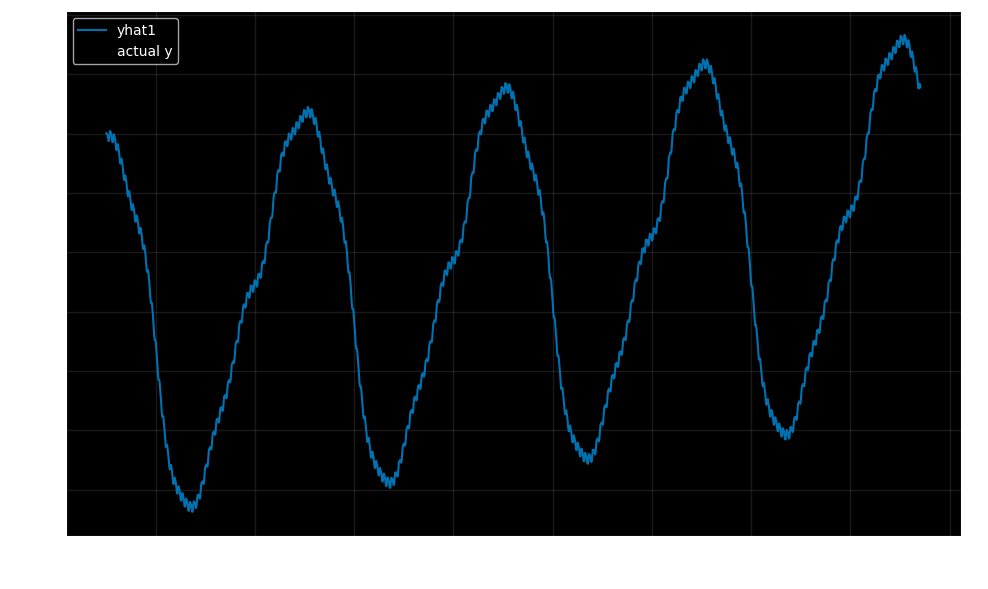

In [27]:
plot = n.plot(forecast)